<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/main/ANALISIS%20FLUIDOS%20GASEOSOS%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Carga de Data_set

from numpy.matrixlib.defmatrix import N
from operator import truediv
import numpy as np
import pandas as pd
Url = "https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/main/Trend280922.csv" #@param {type:"string"}

datos = pd.read_csv(Url,sep=";",decimal=",",index_col=0)
df=pd.DataFrame(datos)
n=100
#df.head()
#df.info()
# segmentan para la curva
for i in range(1,960):
  if i<=n:df1=df.iloc[:n]
  if (i>n and i<=2*n):df2=df.iloc[n:2*n]
  if (i>2*n and i<=3*n):df3=df.iloc[2*n:3*n]
  if (i>3*n and i<=4*n):df4=df.iloc[3*n:4*n]
  if (i>4*n and i<=5*n):df5=df.iloc[4*n:5*n]
  if (i>5*n and i<=6*n):df6=df.iloc[5*n:6*n]
  if (i>6*n and i<=7*n):df7=df.iloc[6*n:7*n]
  if (i>7*n and i<=8*n):df8=df.iloc[7*n:8*n]
  if (i>8*n and i<=9*n):df9=df.iloc[8*n:9*n]
  if (i>9*n and i<=960):df10=df.iloc[9*n:960]

In [18]:
#@title Definiciones
#@markdown Ejecutar antes de graficar
#-----------------------------------------------------------------------------
# DEFINICION DE BARA EN COLORES
import matplotlib.pyplot as plt
def GRAFICAR_Q (T):
  fig, ax = plt.subplots(1, figsize=(100,30))
  fig.suptitle('CAUDAL DE ENTRADA SIDERCA',fontsize=30)
  q=T.FQI161/1000
  p=T.PIR161
  x=T.Time
  bar1=np.arange(len(T.Time))
  #ax.plot(x,q ,color="Blue",label="FQI_161 entrada")
  ax.bar(bar1,T.FQI161/1000,0.6,color="red",alpha=0.5,label="Total(FQI161)")
  ax.plot(x,p ,color="blue",label="PIR_161 entrada")
  #e,=ax.plot(x,q,'o',color="black")
  e,=ax.plot(x,p,'o',color="black")
  plt.grid(visible=True,which='major',color='#666666',linestyle='-')
  fig.autofmt_xdate()
  ax.legend(fontsize=15)
  plt.show()
#-----------------------------------------------------------------------
# DEFINICION DE BARA EN COLORES------------------------------------
def GRAFICO_BARRA(B):
  fig3, (ax)= plt.subplots(1, figsize=(50,20))#(ax,ax0)

  bar1=np.arange(len(B.Time))
  #bar2=[i+0.3 for i in bar1]
  w=0.6
  AA=1
  #ax.bar(bar1,B.FQI161/1000,w-0.1,color="red",alpha=0.5,label="Total(FQI161)")
  ax.bar(bar1,B.FQI165/1000,w,color="tab:blue",label="EAF5_(FQI165)")
  ax.bar(bar1,B.FQI169/1000,w,bottom=B.FQI165/1000,color="orange",label="EAF4_(FQI169)")
  ax.bar(bar1,B.FQI177/1000,w,bottom=(B.FQI165+B.FQI169)/1000,color="green",label="CC2_(FQI177)")
  ax.bar(bar1,B.FQI173/1000,w,bottom=(B.FQI165+B.FQI169+B.FQI177)/1000,color="red",label="CC3_()FQI173")
  ax.bar(bar1,B.FQI151/1000,w,bottom=(B.FQI165+B.FQI169+B.FQI177+B.FQI173)/1000,color="violet",alpha=AA,label="RESTO_(FQI151)")
  plt.xticks(bar1,B.Time)
  #ax.grid(visible=True,which='major',color='#666666',linestyle='-')
  ax.plot(bar1,B.PIR161,label="PRESSURE_(PIR169)")
  #ax0.plot(bar1,B.PIR161)
  r,=ax.plot(B.Time,B.PIR161,'o',color="black")
  #ax0.grid(visible=True,which='major',color='#666666',linestyle='-')
  #r,=ax0.plot(B.Time,B.PIR161,'o',color="black")
  fig3.autofmt_xdate()
  ax.legend(fontsize=15)
  plt.show()
#------------------------------------------------------------------------
def PIE(x,T):
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
 labels = 'EAF5_(FQI165)', 'EAF4_(FQI169)', 'CC2_(FQI177)', 'CC3_()FQI173','RESTO_(FQI151)'
 
 a= (df.loc[x]['FQI165'])*(100/(df.loc[x]['FQI161']))
 b= (df.loc[x]['FQI169'])*(100/(df.loc[x]['FQI161']))
 c= (df.loc[x]['FQI177'])*(100/(df.loc[x]['FQI161']))
 d= (df.loc[x]['FQI173'])*(100/(df.loc[x]['FQI161']))
 e= (df.loc[x]['FQI151'])*(100/(df.loc[x]['FQI161']))

 sizes = [a,b,c,d,e]
 explode = (0, 0.1, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
 fig4, ax4 = plt.subplots(figsize=(12,8))
 
 ax4.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
 ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

 plt.title("Distribución",fontsize=20)

 fig4.legend([str(df.loc[x]['FQI165']),
              str(df.loc[x]['FQI169']),
              str(df.loc[x]['FQI177']),
              str(df.loc[x]['FQI173']),
              str(df.loc[x]['FQI151'])],
              loc='lower right',
              fontsize=15,
              shadow=True,
              facecolor="Bisque",
              edgecolor="SandyBrown",
              title="Caudales",
              title_fontsize=14
 )
 ax4.annotate('Presión:             kg/cm2',
            xy=(1, 1),  
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)
 ax4.annotate(str(df.loc[x]['PIR161']),
            xy=(1, 1),  
            xytext=(0.14, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)
 
 ax4.annotate('N° de nuestra: ',
            xy=(1, 1),  
            xytext=(0.05, 0.1),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14) 
 
 ax4.annotate(str(x),
            xy=(1, 1),  
            xytext=(0.2, 0.1),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)
 
 ax4.annotate('Caudal Total:                   Nm3/h',
            xy=(1, 1),  
            xytext=(0.32, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)
 ax4.annotate(str(df.loc[x]['FQI161']),
            xy=(1, 1),  
            xytext=(0.44, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)

 plt.show()

# ***Trends de caudal y presión caudalimetro entrada.***

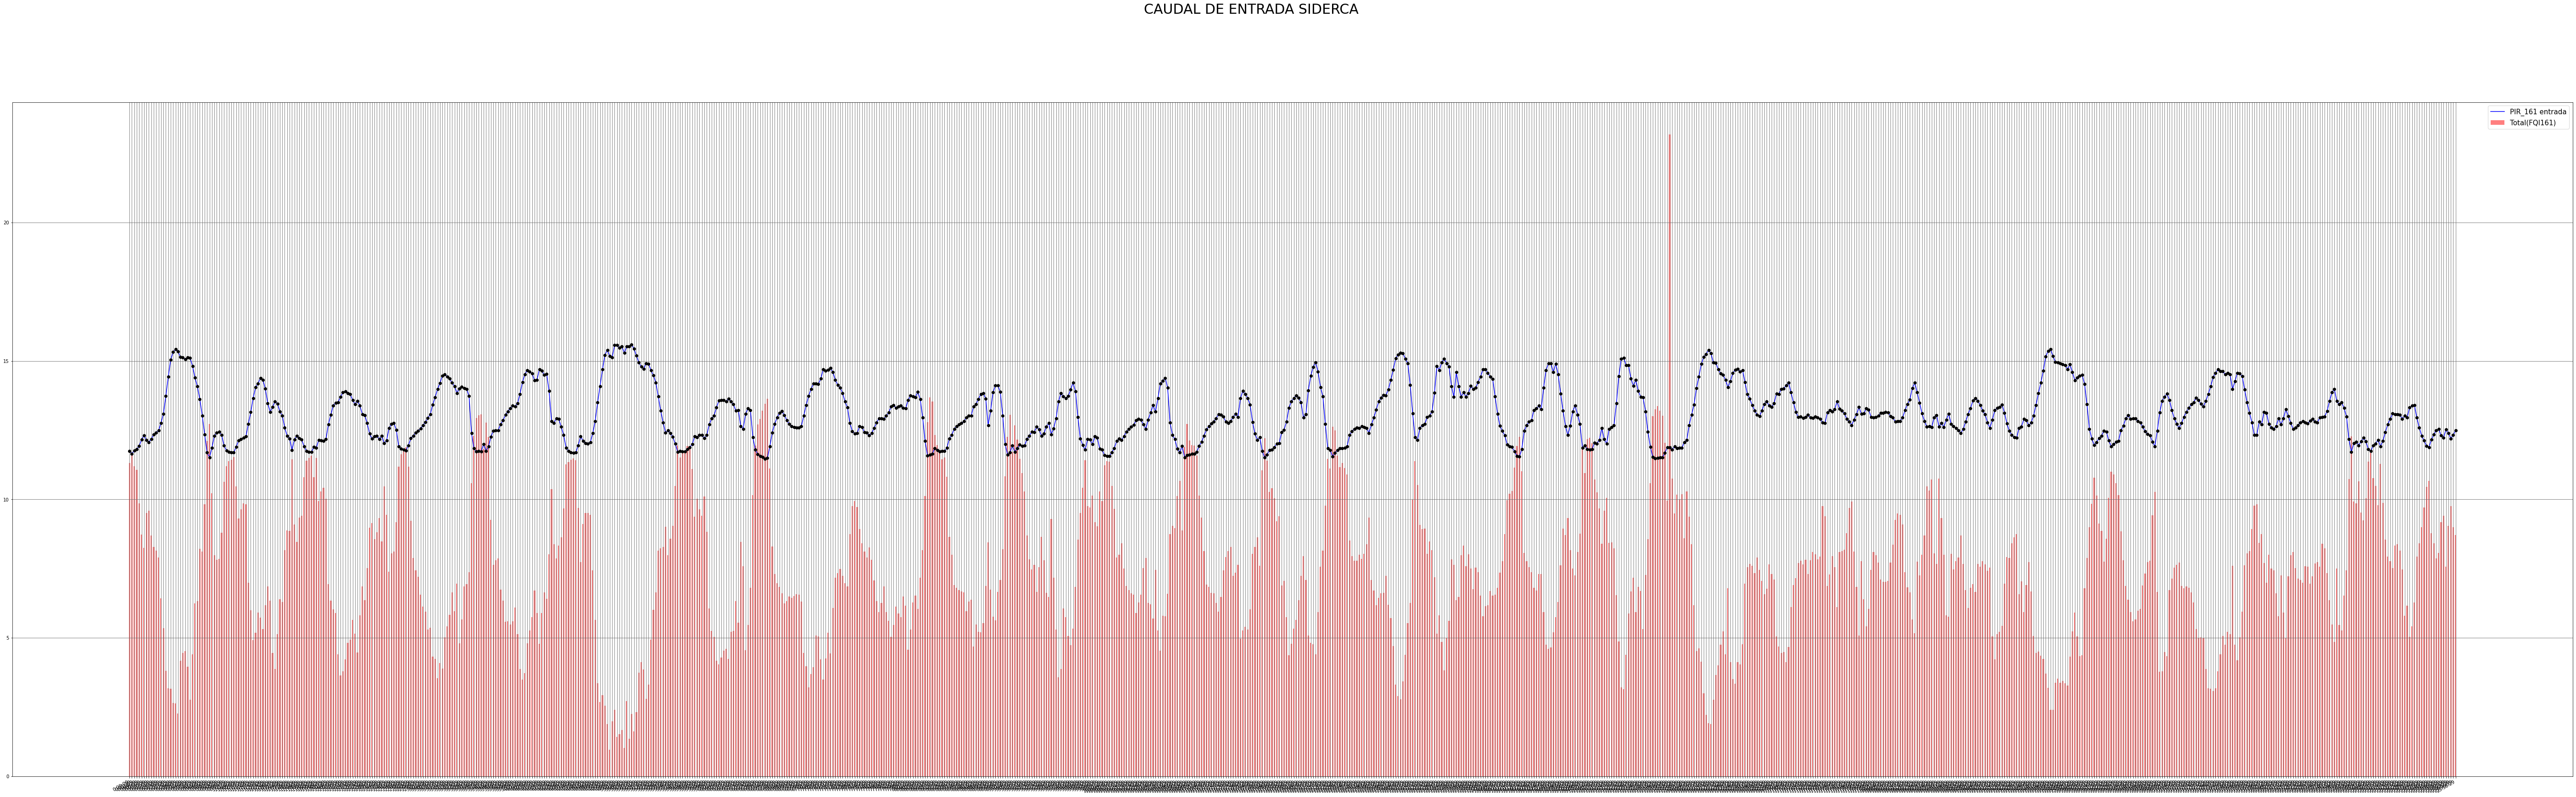

In [3]:
T=df
GRAFICAR_Q(T)

# ***Analisis de maximos y minimos***

In [ ]:
#print(df.FQI161.describe(),df.PIR161.describe())




# ***Muestreo:***

In [4]:
n_muestras=10
dfmax=df.nlargest(n_muestras,'PIR161')
#print(dfmax)
dfmin=df.nsmallest(n_muestras,'PIR161')
#print(dfmin)
dfa=(df.loc[df.loc[:, 'PIR161'] <= 12])
print(dfa.nlargest(n_muestras,'PIR161'))

             Date      Time    FQI161  PIR161   FQI165   FQI169  FQI177  \
indice                                                                    
147     28/9/2168   3:38:59  11813.39   12.00  4549.33  5057.89  326.80   
233     28/9/2254   5:47:59  11097.13   11.99  5494.92  3592.00  298.13   
362     28/9/2383   9:01:29  10829.82   11.99  6241.72  4434.60   31.00   
398     28/9/2419   9:55:29  10142.53   11.99  6275.17  2518.88  178.00   
819     28/9/2840  20:26:59  10899.71   11.99  4541.67  4506.00  143.76   
368     28/9/2389   9:10:29  11467.00   11.98  4505.44  5101.00  160.33   
569     28/9/2590  14:11:59   9967.41   11.98  4499.36  3543.50   51.69   
394     28/9/2415   9:49:29  10417.33   11.96  6312.93  2598.00  167.25   
811     28/9/2832  20:14:59  10785.94   11.96  6286.59  3420.22  168.75   
116     28/9/2137   2:52:29  11181.06   11.95  6384.82  2546.89  211.36   

        FQI173   FQI151  
indice                   
147     232.22  1647.15  
233     145.57  1566.

Grafica de consumos y presion segun consumos

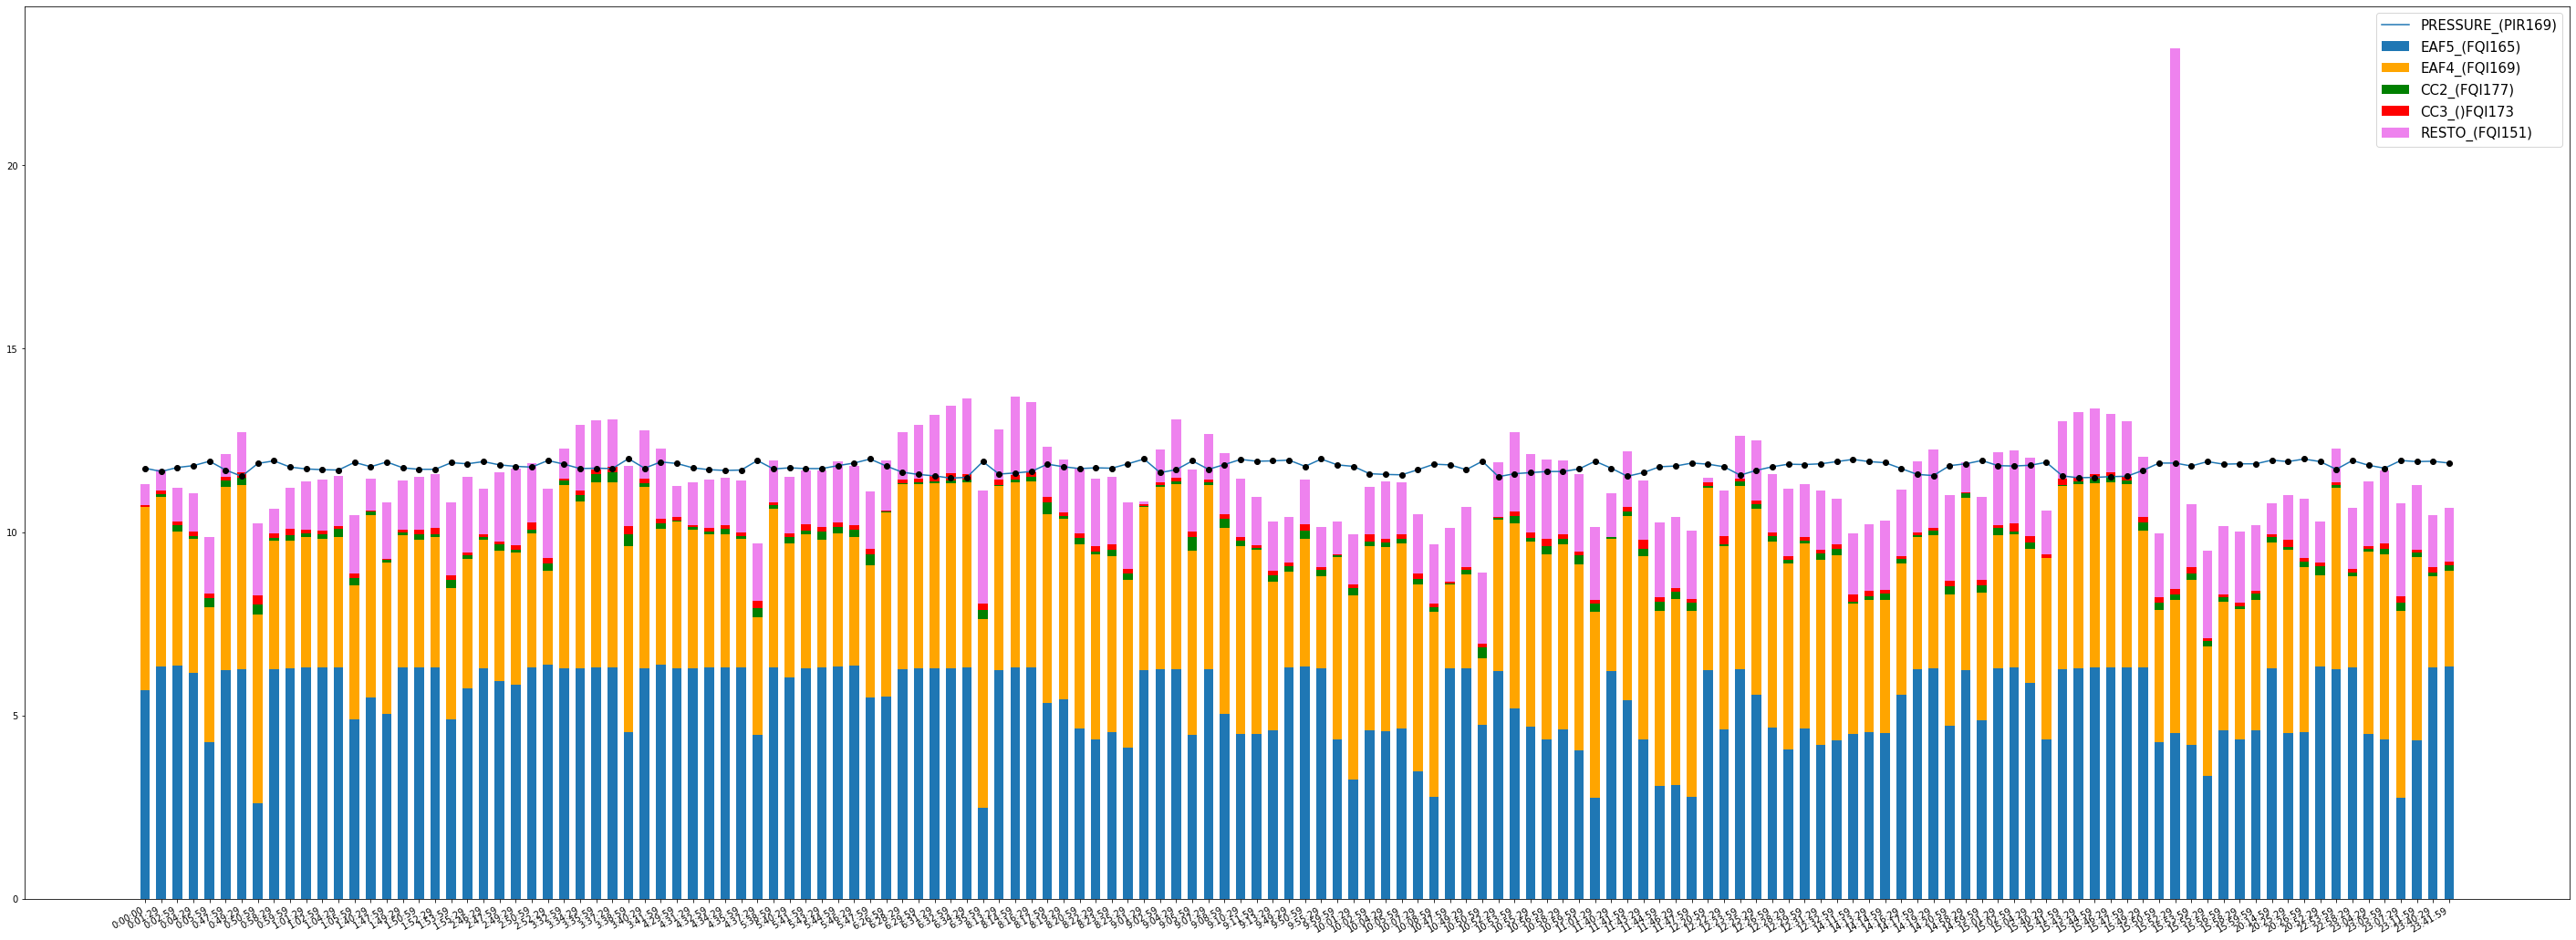

In [5]:
Muestra=dfa

GRAFICO_BARRA(Muestra)

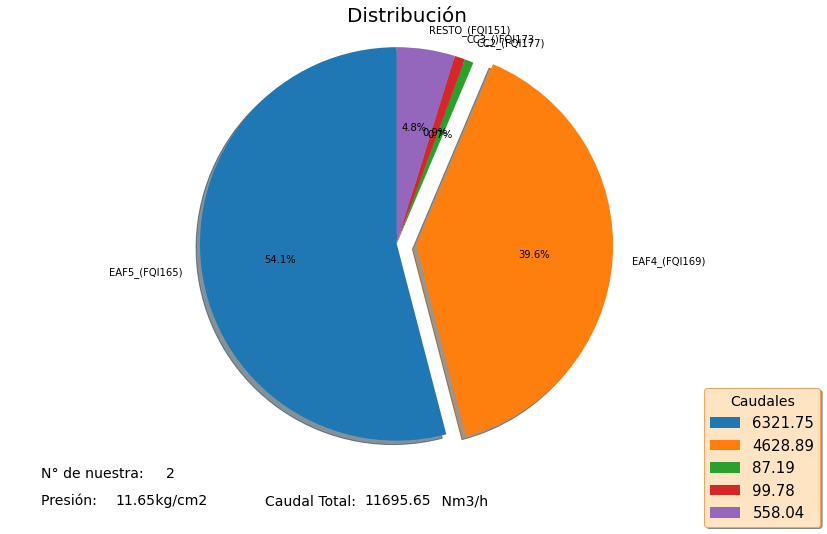

In [20]:
#@title Distribución de la muestra. 
#@markdown Ingrese numero de nuestra a visualizar.
Item = 2 #@param {type:"number"}
PIE(Item,Muestra)